# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


## Part 1: Printing to the Console
### (6 Marks)

In [1]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [2]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = 1
intake_year = 2024
intake_semester = "Fall"   #"Fall" or "Winter"
# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print(f"This is implemented by Group {1}, for ENGG680 {'Fall'} of {2024}")


This is implemented by Group 1, for ENGG680 Fall of 2024


In [3]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")
print(f"The subjects involved in this grading system are {subjects[0]} and {subjects[1]}.")

The subjects involved in this grading system are English and Math.


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [4]:
# In the space below, please import the Pandas library
# (1 mark)
# Importing the Pandas library
import pandas as pd

In [8]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
df_english =pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
df_math =pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!git config --global user.name "RIDWAN-SHARAFADEEN"
!git config --global user.email "ridwankoyejosharafadeen@gmail.com"

In [9]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [10]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
# The StudentID is chosen as the key because it is the unique Identifier
print("The StudentID is chosen as the key because it is the unique Identifier")

The StudentID is chosen as the key because it is the unique Identifier


In [11]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
#
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,firstName_Math,lastName_Math,grade_Math,GPA
0,Emma,Smith,10959,95,Emma,Smith,90,92.5
1,Sophia,Robinson,75175,88,Sophia,Robinson,95,91.5
2,Emma,Taylor,42257,87,Emma,Taylor,85,86.0
3,David,Robinson,55148,86,David,Robinson,87,86.5
4,Stephen,Curry,30303,90,Stephen,Curry,88,89.0


In [12]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)

df_studentGrades = df_studentGrades.drop(columns=['firstName_Math', 'lastName_Math'])
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [13]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
#
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [14]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })
df_studentGrades.head()

,firstName,lastName,studentID,englishGrade,mathGrade,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [15]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
#
# Display statistics for the student grades
df_studentGrades[['englishGrade', 'mathGrade', 'GPA']].describe()


,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [16]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(str)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(str)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(str)
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype(float)
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype(float)
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype(float)

In [17]:
# Now let's see our statistics!
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [18]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted =df_studentGrades.sort_values(by='GPA', ascending=False)
df_studentsGPASorted.head()

,firstName,lastName,studentID,englishGrade,mathGrade,GPA
0,Emma,Smith,10959,95.0,90.0,92.5
12,Sara,Doe,47991,98.0,86.0,92.0
1,Sophia,Robinson,75175,88.0,95.0,91.5
9,Anne,Clark,90449,82.0,99.0,90.5
10,Ryan,Thomas,62137,92.0,89.0,90.5


In [19]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
#
print(".iloc is used to access rows based on their positional index, which is ideal when we want to access a specific row after sorting. Since we've sorted the DataFrame in descending order, the student with the highest GPA will always be at position 0. So, using df_studentsGPASorted.iloc[0] will give us the row with the highest GPA.")

.iloc is used to access rows based on their positional index, which is ideal when we want to access a specific row after sorting. Since we've sorted the DataFrame in descending order, the student with the highest GPA will always be at position 0. So, using df_studentsGPASorted.iloc[0] will give us the row with the highest GPA.


In [20]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student =df_studentsGPASorted.iloc[0]
top_student

,0
firstName,Emma
lastName,Smith
studentID,10959
englishGrade,95.0
mathGrade,90.0
GPA,92.5


In [21]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
#
# Print the first name, last name, and GPA of the student with the highest GPA
print(f"The student with the highest GPA is {top_student['firstName']} {top_student['lastName']} with a GPA of {top_student['GPA']:.2f}")


The student with the highest GPA is Emma Smith with a GPA of 92.50


In [22]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [23]:
# Now print the students whos GPA are lower than 85
# (2 marks)
#
df_GPA_under85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_GPA_under85)


   firstName  lastName studentID  englishGrade  mathGrade   GPA
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [ ]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
#
# Select and print the 'grade' column from the original English grade dataset
print(df_english['grade'])


0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [ ]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
#
print(df_studentGrades['GPA'])

0     92.5
1     91.5
2     86.0
3     86.5
4     89.0
5     83.5
6     82.0
7     84.0
8     89.0
9     90.5
10    90.5
11    89.0
12    92.0
13    82.5
Name: GPA, dtype: float64


In [ ]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
#
print("The datatype is an interger")

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
#
print("The datatype is a float")

# Is it different? Why?
# (1 mark)
#
print("There are different because Interger represent whole number while float often have decimal places ")

The datatype is an interger
The datatype is a float
There are different because Interger represent whole number while float often have decimal places 


In [ ]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom =pd.read_csv('studentHomerooms.csv')

In [ ]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
#
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(str)
df_homeroom['studentID'] = df_homeroom['studentID'].astype(str)
# Merge the datasets on 'studentID' and any other relevant columns
df_group = pd.merge(df_studentGrades, df_homeroom, on=['studentID'], how='inner')
# Display the first few rows of the merged dataset
print(df_group.head())


  firstName_x lastName_x studentID  englishGrade  mathGrade   GPA firstName_y  \
0        Emma      Smith     10959          95.0       90.0  92.5        Emma   
1      Sophia   Robinson     75175          88.0       95.0  91.5      Sophia   
2        Emma     Taylor     42257          87.0       85.0  86.0        Emma   
3       David   Robinson     55148          86.0       87.0  86.5       David   
4     Stephen      Curry     30303          90.0       88.0  89.0     Stephen   

  lastName_y  homeRoom  
0      Smith       313  
1   Robinson       311  
2     Taylor       311  
3   Robinson       313  
4      Curry       313  


In [ ]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()

# Which homeroom has a higher GPA?
# (1 mark)
#

NameError: name 'df_studentInfo' is not defined

In [ ]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
#

In [ ]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

In [ ]:
# Describe what each coding line in the cell above is doing
# (4 marks)
#

In [ ]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
#

## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [ ]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt


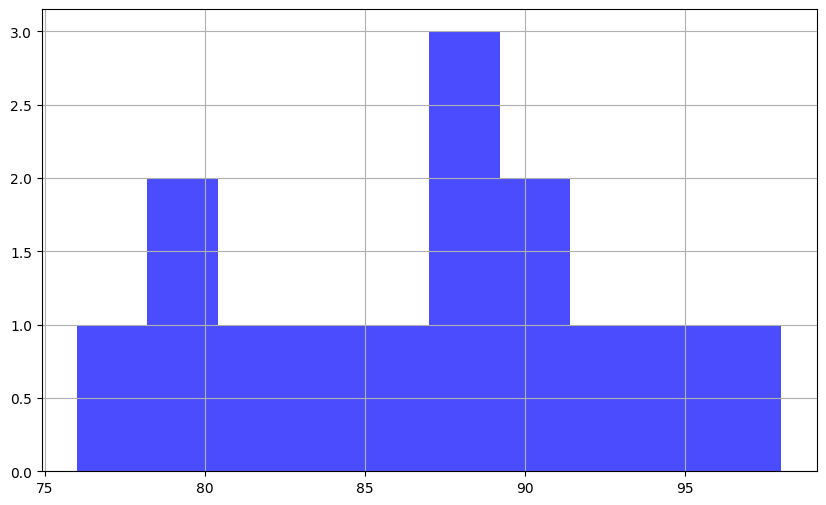

In [ ]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
#
#plt.figure(figsize=(10, 6))
#plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='blue')



# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
#
plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#

plt.show()

In [ ]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
#

# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
#
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
#

plt.show()

In [ ]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
#